# 초기모델

## 심장병


### 6h_hpt

K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [02:22<09:28, 142.05s/it]

38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [04:43<07:04, 141.60s/it]

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [07:12<04:49, 144.97s/it]

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [09:52<02:31, 151.01s/it]

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [12:10<00:00, 146.11s/it]


Evaluation Results:
    Epochs  Batch Size       MAE        MSE      RMSE        R2
0       10          16  2.195169   9.938259  3.152500  0.257122
1       10          32  2.282451  10.593168  3.254715  0.208168
2       10          64  2.359843  10.835719  3.291765  0.190038
3       20          16  2.111041   8.741338  2.956575  0.346591
4       20          32  2.230072   9.741984  3.121215  0.271793
5       20          64  2.177101   9.682930  3.111741  0.276208
6       10          16  2.142343   9.161924  3.026867  0.257972
7       10          32  2.110764   9.367558  3.060647  0.241318
8       10          64  2.177395   9.888289  3.144565  0.199144
9       20          16  1.970575   8.233407  2.869391  0.333173
10      20          32  2.066342   8.628255  2.937389  0.301194
11      20          64  2.102365   8.888489  2.981357  0.280118
12      10          16  2.181489   8.649687  2.941035  0.263614
13      10          32  2.087130   8.724060  2.953652  0.257282
14      10         

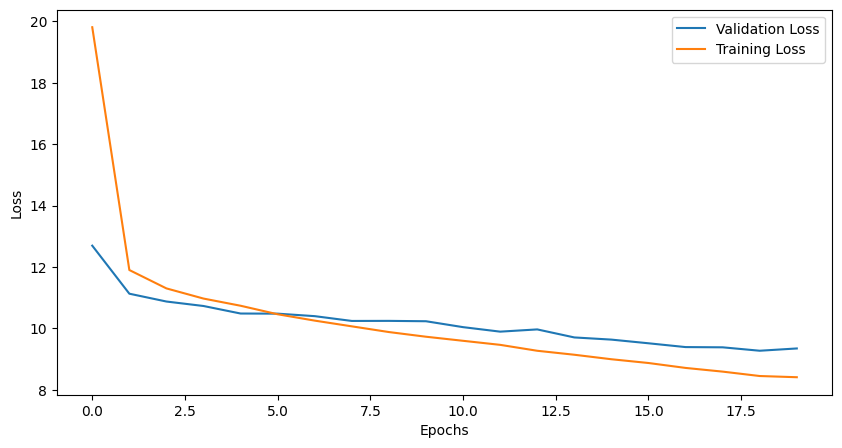

In [ ]:
# 데이터 준비 과정과 모델링 부분 설명
# 주어진 코드는 ICU의 입원 기간(LoS, Length of Stay)을 예측하기 위해 트랜스포머 기반 모델을 사용하여 실험하는 것입니다.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

# 데이터 준비
# 새로운 데이터셋 불러오기
df_circ_target = pd.read_csv('/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_6hour.csv')
df_circ_dataset = pd.read_csv('/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_6hours.csv')

# Feature와 Target 결합
merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los"])
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = 6
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 하이퍼파라미터 튜닝 및 K-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluation_results = []

# 하이퍼파라미터 설정
epochs = [10, 20]  # Epoch 수 변경 가능
batch_sizes = [16, 32, 64]  # Batch size 변경 가능

# K-Fold 교차 검증 수행
for train_index, test_index in tqdm(kf.split(X_tensor), total=kf.get_n_splits(), desc='K-Fold Cross Validation'):
    X_train, X_test = X_tensor[train_index], X_tensor[test_index]
    y_train, y_test = y_tensor[train_index], y_tensor[test_index]

    for epoch in epochs:
        for batch_size in batch_sizes:
            # 트랜스포머 모델 정의
            sequence_length = X_train.shape[1]
            feature_dim = X_train.shape[2]
            inputs = Input(shape=(sequence_length, feature_dim))

            # 트랜스포머 레이어 생성 및 모델 구성
            attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
            attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
            attention_output = Dropout(0.1)(attention_output)

            # 출력 레이어 정의
            pooled_output = GlobalAveragePooling1D()(attention_output)
            output = Dense(1)(pooled_output)
            transformer_model = Model(inputs=inputs, outputs=output)

            # 모델 컴파일
            transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

            # 모델 학습
            history = transformer_model.fit(
                X_train, y_train,
                epochs=epoch,
                batch_size=batch_size,
                validation_data=(X_test, y_test),
                verbose=0
            )

            # 모델 평가
            def evaluate_model(model, X_test, y_test):
                predictions = model.predict(X_test).flatten()
                y_test = y_test.flatten()
                mae = mean_absolute_error(y_test, predictions)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, predictions)
                return mae, mse, rmse, r2

            mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
            evaluation_results.append({
                'Epochs': epoch,
                'Batch Size': batch_size,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            })

# 평가 결과 출력
evaluation_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 12h_hpt

K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [08:02<32:11, 482.88s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [16:04<24:06, 482.31s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [23:55<15:53, 476.88s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [31:33<07:49, 469.55s/it]

120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
120/120 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [39:51<00:00, 478.24s/it]


Evaluation Results:
    Epochs  Batch Size       MAE       MSE      RMSE        R2
0       10          16  1.916177  7.908946  2.812285  0.341090
1       10          32  2.036048  8.414399  2.900758  0.298979
2       10          64  2.022780  8.716523  2.952376  0.273809
3       20          16  1.841906  6.879617  2.622902  0.426845
4       20          32  1.889591  7.176494  2.678898  0.402112
5       20          64  1.924611  7.601065  2.757003  0.366740
6       10          16  1.986395  7.552020  2.748094  0.343768
7       10          32  1.953248  7.863127  2.804127  0.316734
8       10          64  2.030749  8.046835  2.836694  0.300771
9       20          16  1.783216  6.411563  2.532106  0.442868
10      20          32  1.802110  6.583843  2.565900  0.427897
11      20          64  1.886841  7.017029  2.648968  0.390256
12      10          16  1.935086  7.528835  2.743872  0.362672
13      10          32  1.943881  7.967292  2.822639  0.325556
14      10          64  2.025796  

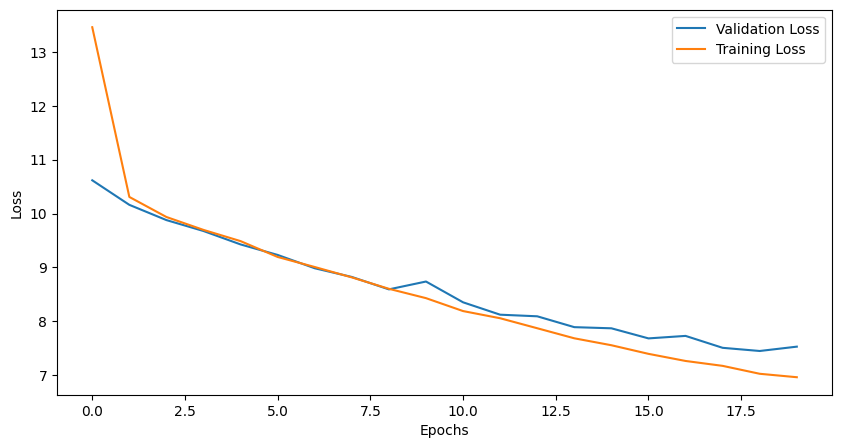

In [ ]:
# 데이터 준비 과정과 모델링 부분 설명
# 주어진 코드는 ICU의 입원 기간(LoS, Length of Stay)을 예측하기 위해 트랜스포머 기반 모델을 사용하여 실험하는 것입니다.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

# 데이터 준비
# 새로운 데이터셋 불러오기
df_circ_target = pd.read_csv('/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_12hour.csv')
df_circ_dataset = pd.read_csv('/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_12hours.csv')

# Feature와 Target 결합
merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los"])
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = 12
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 하이퍼파라미터 튜닝 및 K-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluation_results = []

# 하이퍼파라미터 설정
epochs = [10, 20]  # Epoch 수 변경 가능
batch_sizes = [16, 32, 64]  # Batch size 변경 가능

# K-Fold 교차 검증 수행
for train_index, test_index in tqdm(kf.split(X_tensor), total=kf.get_n_splits(), desc='K-Fold Cross Validation'):
    X_train, X_test = X_tensor[train_index], X_tensor[test_index]
    y_train, y_test = y_tensor[train_index], y_tensor[test_index]

    for epoch in epochs:
        for batch_size in batch_sizes:
            # 트랜스포머 모델 정의
            sequence_length = X_train.shape[1]
            feature_dim = X_train.shape[2]
            inputs = Input(shape=(sequence_length, feature_dim))

            # 트랜스포머 레이어 생성 및 모델 구성
            attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
            attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
            attention_output = Dropout(0.1)(attention_output)

            # 출력 레이어 정의
            pooled_output = GlobalAveragePooling1D()(attention_output)
            output = Dense(1)(pooled_output)
            transformer_model = Model(inputs=inputs, outputs=output)

            # 모델 컴파일
            transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

            # 모델 학습
            history = transformer_model.fit(
                X_train, y_train,
                epochs=epoch,
                batch_size=batch_size,
                validation_data=(X_test, y_test),
                verbose=0
            )

            # 모델 평가
            def evaluate_model(model, X_test, y_test):
                predictions = model.predict(X_test).flatten()
                y_test = y_test.flatten()
                mae = mean_absolute_error(y_test, predictions)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, predictions)
                return mae, mse, rmse, r2

            mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
            evaluation_results.append({
                'Epochs': epoch,
                'Batch Size': batch_size,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            })

# 평가 결과 출력
evaluation_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 18h_hpt

K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [01:07<04:29, 67.47s/it]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [02:23<03:36, 72.28s/it]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [03:30<02:20, 70.22s/it]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [04:38<01:09, 69.15s/it]

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [05:46<00:00, 69.22s/it]


Evaluation Results:
    Epochs  Batch Size       MAE       MSE      RMSE        R2
0       10          16  2.066797  9.398690  3.065728  0.073194
1       10          32  2.063017  9.643759  3.105440  0.049028
2       10          64  2.016412  9.507353  3.083400  0.062479
3       20          16  2.077432  9.882480  3.143641  0.025487
4       20          32  2.147041  9.871828  3.141947  0.026538
5       20          64  2.074180  9.670938  3.109813  0.046348
6       10          16  1.835418  8.615726  2.935256  0.228803
7       10          32  1.880632  8.746606  2.957466  0.217088
8       10          64  1.878143  8.857298  2.976121  0.207179
9       20          16  1.873563  9.210938  3.034953  0.175525
10      20          32  1.848619  8.931295  2.988527  0.200556
11      20          64  1.838479  8.580966  2.929329  0.231914
12      10          16  1.770809  7.472628  2.733611  0.210834
13      10          32  1.761562  7.492820  2.737302  0.208701
14      10          64  1.808885  

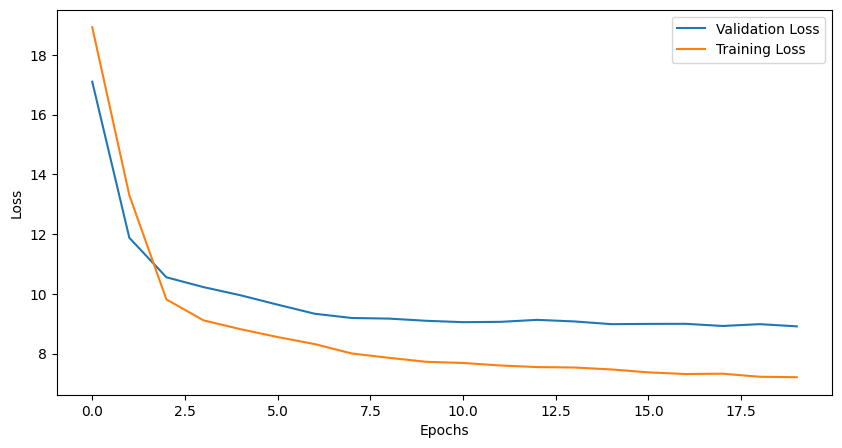

In [ ]:
# 데이터 준비 과정과 모델링 부분 설명
# 주어진 코드는 ICU의 입원 기간(LoS, Length of Stay)을 예측하기 위해 트랜스포머 기반 모델을 사용하여 실험하는 것입니다.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

# 데이터 준비
# 새로운 데이터셋 불러오기
df_circ_target = pd.read_csv('/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_18hour.csv')
df_circ_dataset = pd.read_csv('/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_in_18hour.csv')

# Feature와 Target 결합
merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los"])
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = 18
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 하이퍼파라미터 튜닝 및 K-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluation_results = []

# 하이퍼파라미터 설정
epochs = [10, 20]  # Epoch 수 변경 가능
batch_sizes = [16, 32, 64]  # Batch size 변경 가능

# K-Fold 교차 검증 수행
for train_index, test_index in tqdm(kf.split(X_tensor), total=kf.get_n_splits(), desc='K-Fold Cross Validation'):
    X_train, X_test = X_tensor[train_index], X_tensor[test_index]
    y_train, y_test = y_tensor[train_index], y_tensor[test_index]

    for epoch in epochs:
        for batch_size in batch_sizes:
            # 트랜스포머 모델 정의
            sequence_length = X_train.shape[1]
            feature_dim = X_train.shape[2]
            inputs = Input(shape=(sequence_length, feature_dim))

            # 트랜스포머 레이어 생성 및 모델 구성
            attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
            attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
            attention_output = Dropout(0.1)(attention_output)

            # 출력 레이어 정의
            pooled_output = GlobalAveragePooling1D()(attention_output)
            output = Dense(1)(pooled_output)
            transformer_model = Model(inputs=inputs, outputs=output)

            # 모델 컴파일
            transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

            # 모델 학습
            history = transformer_model.fit(
                X_train, y_train,
                epochs=epoch,
                batch_size=batch_size,
                validation_data=(X_test, y_test),
                verbose=0
            )

            # 모델 평가
            def evaluate_model(model, X_test, y_test):
                predictions = model.predict(X_test).flatten()
                y_test = y_test.flatten()
                mae = mean_absolute_error(y_test, predictions)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, predictions)
                return mae, mse, rmse, r2

            mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
            evaluation_results.append({
                'Epochs': epoch,
                'Batch Size': batch_size,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            })

# 평가 결과 출력
evaluation_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## 감염병

### 6h_hpt

K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [01:57<07:48, 117.18s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [03:51<05:47, 115.79s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [05:47<03:51, 115.77s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [07:46<01:56, 116.86s/it]

80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [09:37<00:00, 115.53s/it]


Evaluation Results:
    Epochs  Batch Size       MAE       MSE      RMSE        R2
0       10          16  2.297059  8.903655  2.983899  0.196045
1       10          32  2.330908  8.941760  2.990278  0.192605
2       10          64  2.336301  9.240482  3.039816  0.165632
3       20          16  2.304613  8.626791  2.937140  0.221045
4       20          32  2.289800  8.947950  2.991312  0.192046
5       20          64  2.321108  9.063515  3.010567  0.181611
6       10          16  2.394950  8.849118  2.974747  0.189816
7       10          32  2.290277  8.826805  2.970994  0.191859
8       10          64  2.376958  9.050891  3.008470  0.171343
9       20          16  2.256710  8.417558  2.901303  0.229328
10      20          32  2.261268  8.466349  2.909699  0.224861
11      20          64  2.290347  8.499735  2.915430  0.221804
12      10          16  2.268344  8.583189  2.929708  0.198754
13      10          32  2.281680  8.830840  2.971673  0.175635
14      10          64  2.292676  

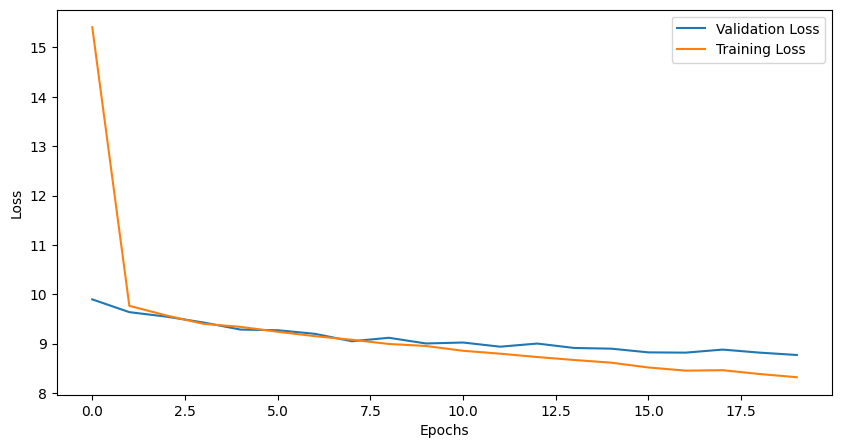

In [ ]:
# 데이터 준비 과정과 모델링 부분 설명
# 주어진 코드는 ICU의 입원 기간(LoS, Length of Stay)을 예측하기 위해 트랜스포머 기반 모델을 사용하여 실험하는 것입니다.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

hour  = 3#int(input())

# 데이터 준비
# 새로운 데이터셋 불러오기
df_circ_target = pd.read_csv(f'/content/drive/MyDrive/DA_dataset/infection_target_in_{hour}hour.csv')
df_circ_dataset = pd.read_csv(f'/content/drive/MyDrive/DA_dataset/infection_dataset_in_{hour}hour.csv')

# Feature와 Target 결합
merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los"])
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = hour
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 하이퍼파라미터 튜닝 및 K-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluation_results = []

# 하이퍼파라미터 설정
epochs = [10, 20]  # Epoch 수 변경 가능
batch_sizes = [16, 32, 64]  # Batch size 변경 가능

# K-Fold 교차 검증 수행
for train_index, test_index in tqdm(kf.split(X_tensor), total=kf.get_n_splits(), desc='K-Fold Cross Validation'):
    X_train, X_test = X_tensor[train_index], X_tensor[test_index]
    y_train, y_test = y_tensor[train_index], y_tensor[test_index]

    for epoch in epochs:
        for batch_size in batch_sizes:
            # 트랜스포머 모델 정의
            sequence_length = X_train.shape[1]
            feature_dim = X_train.shape[2]
            inputs = Input(shape=(sequence_length, feature_dim))

            # 트랜스포머 레이어 생성 및 모델 구성
            attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
            attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
            attention_output = Dropout(0.1)(attention_output)

            # 출력 레이어 정의
            pooled_output = GlobalAveragePooling1D()(attention_output)
            output = Dense(1)(pooled_output)
            transformer_model = Model(inputs=inputs, outputs=output)

            # 모델 컴파일
            transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

            # 모델 학습
            history = transformer_model.fit(
                X_train, y_train,
                epochs=epoch,
                batch_size=batch_size,
                validation_data=(X_test, y_test),
                verbose=0
            )

            # 모델 평가
            def evaluate_model(model, X_test, y_test):
                predictions = model.predict(X_test).flatten()
                y_test = y_test.flatten()
                mae = mean_absolute_error(y_test, predictions)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, predictions)
                return mae, mse, rmse, r2

            mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
            evaluation_results.append({
                'Epochs': epoch,
                'Batch Size': batch_size,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            })

# 평가 결과 출력
evaluation_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 12h_hpt

12


K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [00:39<02:36, 39.03s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [01:21<02:02, 40.98s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [02:02<01:22, 41.05s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [02:43<00:41, 41.07s/it]

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [03:24<00:00, 40.85s/it]


Evaluation Results:
    Epochs  Batch Size       MAE        MSE      RMSE        R2
0       10          16  2.244103   8.567850  2.927089  0.100645
1       10          32  2.206235   8.359112  2.891213  0.122556
2       10          64  2.231101   8.443369  2.905748  0.113711
3       20          16  2.319978   9.047566  3.007917  0.050290
4       20          32  2.284931   8.981505  2.996916  0.057224
5       20          64  2.254327   8.675738  2.945460  0.089320
6       10          16  2.325455   9.683604  3.111849  0.089984
7       10          32  2.368514   9.598266  3.098107  0.098003
8       10          64  2.350716   9.505810  3.083149  0.106692
9       20          16  2.378465  10.107003  3.179151  0.050195
10      20          32  2.413254  10.003570  3.162842  0.059915
11      20          64  2.350933   9.514363  3.084536  0.105888
12      10          16  2.247289   8.562399  2.926158  0.143403
13      10          32  2.242338   8.386286  2.895908  0.161022
14      10         

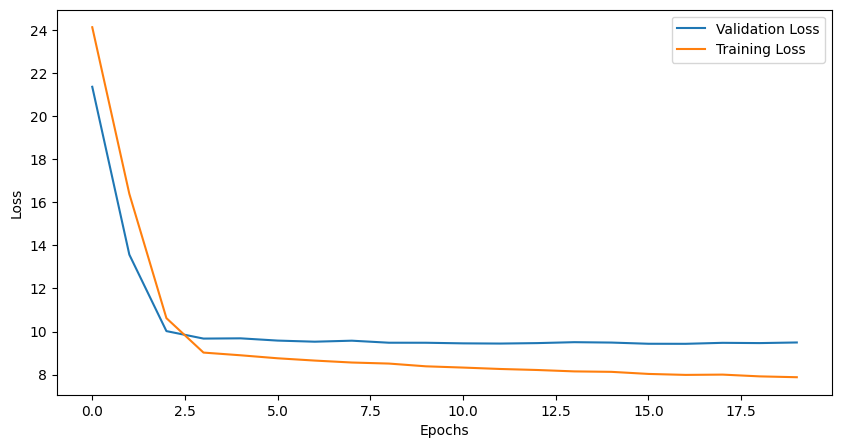

In [ ]:
# 데이터 준비 과정과 모델링 부분 설명
# 주어진 코드는 ICU의 입원 기간(LoS, Length of Stay)을 예측하기 위해 트랜스포머 기반 모델을 사용하여 실험하는 것입니다.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

hour  = 12#int(input())

# 데이터 준비
# 새로운 데이터셋 불러오기
df_circ_target = pd.read_csv(f'/content/drive/MyDrive/DA_dataset/infection_target_in_{hour}hour.csv')
df_circ_dataset = pd.read_csv(f'/content/drive/MyDrive/DA_dataset/infection_dataset_in_{hour}hour.csv')

# Feature와 Target 결합
merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los"])
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = hour
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 하이퍼파라미터 튜닝 및 K-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluation_results = []

# 하이퍼파라미터 설정
epochs = [10, 20]  # Epoch 수 변경 가능
batch_sizes = [16, 32, 64]  # Batch size 변경 가능

# K-Fold 교차 검증 수행
for train_index, test_index in tqdm(kf.split(X_tensor), total=kf.get_n_splits(), desc='K-Fold Cross Validation'):
    X_train, X_test = X_tensor[train_index], X_tensor[test_index]
    y_train, y_test = y_tensor[train_index], y_tensor[test_index]

    for epoch in epochs:
        for batch_size in batch_sizes:
            # 트랜스포머 모델 정의
            sequence_length = X_train.shape[1]
            feature_dim = X_train.shape[2]
            inputs = Input(shape=(sequence_length, feature_dim))

            # 트랜스포머 레이어 생성 및 모델 구성
            attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
            attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
            attention_output = Dropout(0.1)(attention_output)

            # 출력 레이어 정의
            pooled_output = GlobalAveragePooling1D()(attention_output)
            output = Dense(1)(pooled_output)
            transformer_model = Model(inputs=inputs, outputs=output)

            # 모델 컴파일
            transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

            # 모델 학습
            history = transformer_model.fit(
                X_train, y_train,
                epochs=epoch,
                batch_size=batch_size,
                validation_data=(X_test, y_test),
                verbose=0
            )

            # 모델 평가
            def evaluate_model(model, X_test, y_test):
                predictions = model.predict(X_test).flatten()
                y_test = y_test.flatten()
                mae = mean_absolute_error(y_test, predictions)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, predictions)
                return mae, mse, rmse, r2

            mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
            evaluation_results.append({
                'Epochs': epoch,
                'Batch Size': batch_size,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            })

# 평가 결과 출력
evaluation_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


### 18h_hpt

18


K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [00:48<03:12, 48.14s/it]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [01:34<02:21, 47.26s/it]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [02:18<01:31, 45.86s/it]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [03:08<00:47, 47.27s/it]

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [03:54<00:00, 46.85s/it]


Evaluation Results:
    Epochs  Batch Size       MAE        MSE      RMSE        R2
0       10          16  2.144389   7.554300  2.748509  0.157339
1       10          32  2.192882   7.750208  2.783919  0.135486
2       10          64  2.187179   7.651263  2.766092  0.146523
3       20          16  2.112111   7.614516  2.759441  0.150622
4       20          32  2.160969   7.897765  2.810296  0.119026
5       20          64  2.210430   7.866194  2.804674  0.122548
6       10          16  2.169163   7.658920  2.767475  0.125028
7       10          32  2.127795   7.567280  2.750869  0.135497
8       10          64  2.199793   7.814643  2.795468  0.107238
9       20          16  2.187371   8.274445  2.876533  0.054709
10      20          32  2.154836   7.766775  2.786893  0.112706
11      20          64  2.156599   7.875110  2.806263  0.100330
12      10          16  2.386278   9.698764  3.114284  0.140120
13      10          32  2.387024   9.692609  3.113296  0.140666
14      10         

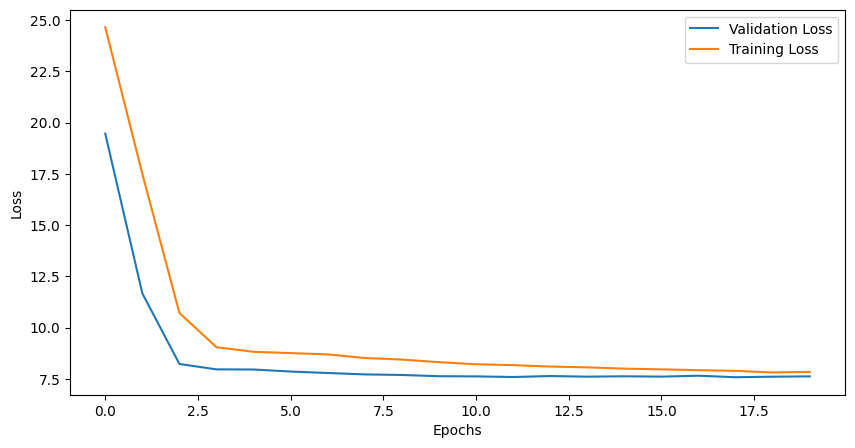

In [ ]:
# 데이터 준비 과정과 모델링 부분 설명
# 주어진 코드는 ICU의 입원 기간(LoS, Length of Stay)을 예측하기 위해 트랜스포머 기반 모델을 사용하여 실험하는 것입니다.

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

hour  = 18#int(input())

# 데이터 준비
# 새로운 데이터셋 불러오기
df_circ_target = pd.read_csv(f'/content/drive/MyDrive/DA_dataset/infection_target_in_{hour}hour.csv')
df_circ_dataset = pd.read_csv(f'/content/drive/MyDrive/DA_dataset/infection_dataset_in_{hour}hour.csv')

# Feature와 Target 결합
merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

# Feature와 Target 분리
X = merged_dataset.drop(columns=["stay_id", "los"])
y = merged_dataset["los"]

# 데이터 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# stay_id 및 los 컬럼 다시 추가
X_scaled_df['stay_id'] = merged_dataset['stay_id']
X_scaled_df['los'] = y

# 텐서 생성 함수
def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

# 시퀀스 길이
sequence_length = hour
X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

# 하이퍼파라미터 튜닝 및 K-Fold 교차 검증 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
evaluation_results = []

# 하이퍼파라미터 설정
epochs = [10, 20]  # Epoch 수 변경 가능
batch_sizes = [16, 32, 64]  # Batch size 변경 가능

# K-Fold 교차 검증 수행
for train_index, test_index in tqdm(kf.split(X_tensor), total=kf.get_n_splits(), desc='K-Fold Cross Validation'):
    X_train, X_test = X_tensor[train_index], X_tensor[test_index]
    y_train, y_test = y_tensor[train_index], y_tensor[test_index]

    for epoch in epochs:
        for batch_size in batch_sizes:
            # 트랜스포머 모델 정의
            sequence_length = X_train.shape[1]
            feature_dim = X_train.shape[2]
            inputs = Input(shape=(sequence_length, feature_dim))

            # 트랜스포머 레이어 생성 및 모델 구성
            attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
            attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
            attention_output = Dropout(0.1)(attention_output)

            # 출력 레이어 정의
            pooled_output = GlobalAveragePooling1D()(attention_output)
            output = Dense(1)(pooled_output)
            transformer_model = Model(inputs=inputs, outputs=output)

            # 모델 컴파일
            transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

            # 모델 학습
            history = transformer_model.fit(
                X_train, y_train,
                epochs=epoch,
                batch_size=batch_size,
                validation_data=(X_test, y_test),
                verbose=0
            )

            # 모델 평가
            def evaluate_model(model, X_test, y_test):
                predictions = model.predict(X_test).flatten()
                y_test = y_test.flatten()
                mae = mean_absolute_error(y_test, predictions)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, predictions)
                return mae, mse, rmse, r2

            mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
            evaluation_results.append({
                'Epochs': epoch,
                'Batch Size': batch_size,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            })

# 평가 결과 출력
evaluation_df = pd.DataFrame(evaluation_results)
print("\nEvaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
plt.figure(figsize=(10, 5))
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# 시퀀스길이를 hpt에 포함

## 테스트

### train1


Dataset: 심혈관 6시간

Sequence Length: 3
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Sequence Length: 6
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Dataset: 심혈관 12시간

Sequence Length: 3
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Sequence Length: 6
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sequence Length: 9
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sequence Length: 12
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Dataset: 심혈관 18시간

Sequence Length: 3
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sequence Length: 6
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sequence Length: 9
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sequence Length: 12
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Sequence Length: 15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Sequence Length: 18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step

All Evaluation Results:
     Epochs  Batch Size       MAE       MSE      RMSE        R2   Dataset  \
0        10          16  2.059379  7.477914  2.734577  0.202526       NaN   
1        10          32  2.112023  7.

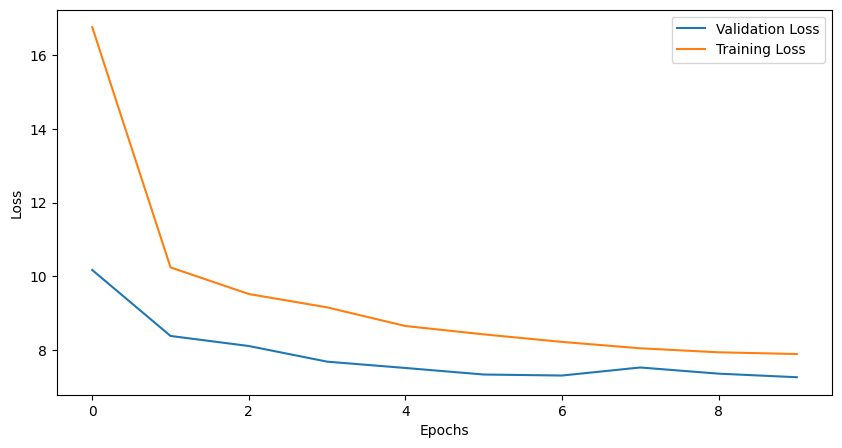

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

# 데이터셋 경로 정보
DATASETS = [
    {
        "name": "심혈관 6시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_6hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_6hours.csv",
        "max_sequence_length": 6
    },
    {
        "name": "심혈관 12시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_12hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_12hours.csv",
        "max_sequence_length": 12
    },
    {
        "name": "심혈관 18시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_18hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_in_18hour.csv",
        "max_sequence_length": 18
    },
]

# 하이퍼파라미터 설정
epochs = [10]  # Epoch 수 변경 가능
batch_sizes = [32]  # Batch size 변경 가능

# 모델 학습 및 평가 수행
all_evaluation_results = []

def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

for dataset in DATASETS:
    print(f"\nDataset: {dataset['name']}")

    # 데이터 준비
    df_circ_target = pd.read_csv(dataset['target_path'])
    df_circ_dataset = pd.read_csv(dataset['dataset_path'])

    # Feature와 Target 결합
    merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

    # Feature와 Target 분리
    X = merged_dataset.drop(columns=["stay_id", "los"])
    y = merged_dataset["los"]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # stay_id 및 los 컬럼 다시 추가
    X_scaled_df['stay_id'] = merged_dataset['stay_id']
    X_scaled_df['los'] = y

    # 시퀀스 길이별로 학습 및 평가 수행
    sequence_lengths = [i for i in range(3, dataset['max_sequence_length'] + 1, 3)]
    for sequence_length in sequence_lengths:
        print(f"\nSequence Length: {sequence_length}")

        # 텐서 생성
        X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

        if len(X_tensor) == 0 or len(y_tensor) == 0:
            print(f"Skipping sequence length {sequence_length} due to insufficient data.")
            continue

        # 학습 및 테스트 데이터 분할
        train_size = int(0.8 * len(X_tensor))
        if train_size == 0:
            print(f"Skipping sequence length {sequence_length} due to insufficient training data.")
            continue

        X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
        y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

        for epoch in epochs:
            for batch_size in batch_sizes:
                # 트랜스포머 모델 정의
                feature_dim = X_train.shape[2]
                inputs = Input(shape=(sequence_length, feature_dim))

                # 트랜스포머 레이어 생성 및 모델 구성
                attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
                attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
                attention_output = Dropout(0.1)(attention_output)

                # 출력 레이어 정의
                pooled_output = GlobalAveragePooling1D()(attention_output)
                output = Dense(1)(pooled_output)
                transformer_model = Model(inputs=inputs, outputs=output)

                # 모델 컴파일
                transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

                # 모델 학습
                if len(X_train) == 0 or len(y_train) == 0:
                    print(f"Skipping training due to insufficient training data for sequence length {sequence_length}.")
                    continue

                history = transformer_model.fit(
                    X_train, y_train,
                    epochs=epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=0
                )

                # 모델 평가
                def evaluate_model(model, X_test, y_test):
                    if len(X_test) == 0 or len(y_test) == 0:
                        return None, None, None, None
                    predictions = model.predict(X_test).flatten()
                    y_test = y_test.flatten()
                    mae = mean_absolute_error(y_test, predictions)
                    mse = mean_squared_error(y_test, predictions)
                    rmse = np.sqrt(mse)
                    r2 = r2_score(y_test, predictions)
                    return mae, mse, rmse, r2

                mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
                if mae is None:
                    print(f"Skipping evaluation due to insufficient test data for sequence length {sequence_length}.")
                    continue

                evaluation_results.append({
                    'Dataset': dataset['name'],
                    'Sequence Length': sequence_length,
                    'Epochs': epoch,
                    'Batch Size': batch_size,
                    'MAE': mae,
                    'MSE': mse,
                    'RMSE': rmse,
                    'R2': r2
                })

        all_evaluation_results.extend(evaluation_results)

# 모든 평가 결과 출력
evaluation_df = pd.DataFrame(all_evaluation_results)
print("\nAll Evaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
if 'history' in locals():
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


### train2


Dataset: 심혈관 6시간

Sequence Length: 3
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Sequence Length: 6
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Dataset: 심혈관 12시간

Sequence Length: 3
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Sequence Length: 6
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sequence Length: 9
177/177 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sequence Length: 12
120/120 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Dataset: 심혈관 18시간

Sequence Length: 3
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Sequence Length: 6
190/190 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sequence Length: 9
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

Sequence Length: 12
103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step

Sequence Length: 15
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Sequence Length: 18
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step

All Evaluation Results:
     Dataset  Sequence Length  Epochs  Batch Size       MAE        MSE  \
0    심혈관 6시간                3      10          32  2.180485   9.902278   
1    심혈관 6시간                6      10      

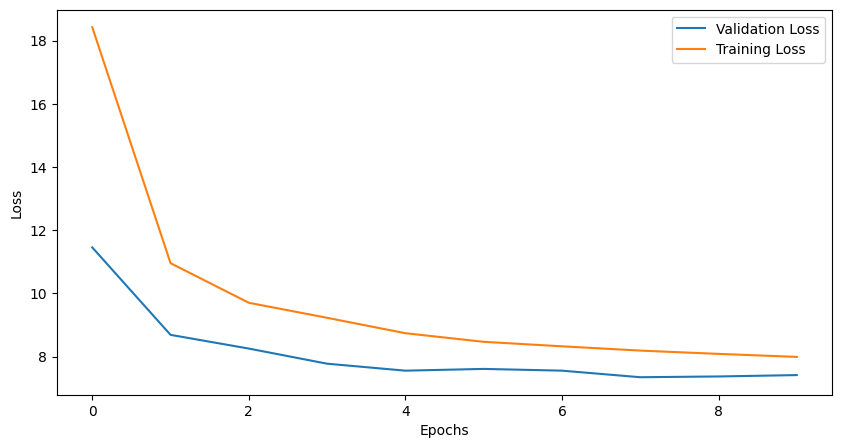

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

# 데이터셋 경로 정보
DATASETS = [
    {
        "name": "심혈관 6시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_6hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_6hours.csv",
        "max_sequence_length": 6
    },
    {
        "name": "심혈관 12시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_12hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_12hours.csv",
        "max_sequence_length": 12
    },
    {
        "name": "심혈관 18시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_18hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_in_18hour.csv",
        "max_sequence_length": 18
    },
]

# 하이퍼파라미터 설정
epochs = [10]  # Epoch 수 변경 가능
batch_sizes = [32]  # Batch size 변경 가능

# 모델 학습 및 평가 수행
all_evaluation_results = []

def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

for dataset in DATASETS:
    print(f"\nDataset: {dataset['name']}")

    # 데이터 준비
    df_circ_target = pd.read_csv(dataset['target_path'])
    df_circ_dataset = pd.read_csv(dataset['dataset_path'])

    # Feature와 Target 결합
    merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

    # Feature와 Target 분리
    X = merged_dataset.drop(columns=["stay_id", "los"])
    y = merged_dataset["los"]

    # 데이터 스케일링
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # stay_id 및 los 컬럼 다시 추가
    X_scaled_df['stay_id'] = merged_dataset['stay_id']
    X_scaled_df['los'] = y

    # 시퀀스 길이별로 학습 및 평가 수행
    sequence_lengths = [i for i in range(3, dataset['max_sequence_length'] + 1, 3)]
    for sequence_length in sequence_lengths:
        print(f"\nSequence Length: {sequence_length}")

        # 텐서 생성
        X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

        if len(X_tensor) == 0 or len(y_tensor) == 0:
            print(f"Skipping sequence length {sequence_length} due to insufficient data.")
            continue

        # 학습 및 테스트 데이터 분할
        train_size = int(0.8 * len(X_tensor))
        if train_size == 0:
            print(f"Skipping sequence length {sequence_length} due to insufficient training data.")
            continue

        X_train, X_test = X_tensor[:train_size], X_tensor[train_size:]
        y_train, y_test = y_tensor[:train_size], y_tensor[train_size:]

        for epoch in epochs:
            for batch_size in batch_sizes:
                # 트랜스포머 모델 정의
                feature_dim = X_train.shape[2]
                inputs = Input(shape=(sequence_length, feature_dim))

                # 트랜스포머 레이어 생성 및 모델 구성
                attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
                attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
                attention_output = Dropout(0.1)(attention_output)

                # 출력 레이어 정의
                pooled_output = GlobalAveragePooling1D()(attention_output)
                output = Dense(1)(pooled_output)
                transformer_model = Model(inputs=inputs, outputs=output)

                # 모델 컴파일
                transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

                # 모델 학습
                if len(X_train) == 0 or len(y_train) == 0:
                    print(f"Skipping training due to insufficient training data for sequence length {sequence_length}.")
                    continue

                history = transformer_model.fit(
                    X_train, y_train,
                    epochs=epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, y_test),
                    verbose=0
                )

                # 모델 평가
                def evaluate_model(model, X_test, y_test):
                    if len(X_test) == 0 or len(y_test) == 0:
                        return None, None, None, None
                    predictions = model.predict(X_test).flatten()
                    y_test = y_test.flatten()
                    mae = mean_absolute_error(y_test, predictions)
                    mse = mean_squared_error(y_test, predictions)
                    rmse = np.sqrt(mse)
                    r2 = r2_score(y_test, predictions)
                    return mae, mse, rmse, r2

                mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
                if mae is None:
                    print(f"Skipping evaluation due to insufficient test data for sequence length {sequence_length}.")
                    continue

                evaluation_results = {
                    'Dataset': dataset['name'],
                    'Sequence Length': sequence_length,
                    'Epochs': epoch,
                    'Batch Size': batch_size,
                    'MAE': mae,
                    'MSE': mse,
                    'RMSE': rmse,
                    'R2': r2
                }
                all_evaluation_results.append(evaluation_results)

# 모든 평가 결과 출력
evaluation_df = pd.DataFrame(all_evaluation_results)
print("\nAll Evaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
if 'history' in locals() and len(history.history['val_loss']) > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


## 심혈관


Dataset: 심혈관 6시간

Sequence Length: 3


K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [01:31<06:06, 91.69s/it]

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [03:01<04:31, 90.40s/it]

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [04:29<02:59, 89.58s/it]

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [05:58<01:29, 89.36s/it]

69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
69/69 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [07:26<00:00, 89.24s/it]


Dataset: 심혈관 12시간



Sequence Length: 6


K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [05:34<22:17, 334.37s/it]

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [11:10<16:46, 335.53s/it]

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [16:38<11:03, 331.86s/it]

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [21:58<05:27, 327.23s/it]

236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
236/236 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [27:04<00:00, 324.83s/it]


Dataset: 심혈관 18시간



Sequence Length: 9


K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [03:32<14:09, 212.40s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [07:02<10:33, 211.08s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [10:35<07:03, 211.92s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [14:15<03:35, 215.11s/it]

146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
146/146 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [18:02<00:00, 216.45s/it]


All Evaluation Results:
     Dataset  Sequence Length  Epochs  Batch Size       MAE        MSE  \
0    심혈관 6시간                3      10          16  2.179044  10.174772   
1    심혈관 6시간                3      20          16  2.190162   9.955256   
2    심혈관 6시간                3      10          32  2.192085  10.032268   
3    심혈관 6시간                3      20          32  2.189485   9.874284   
4    심혈관 6시간                3      10          16  2.259332   9.745126   
5    심혈관 6시간                3      20          16  2.108890   9.435863   
6    심혈관 6시간                3      10          32  2.115587   9.736786   
7    심혈관 6시간                3      20          32  2.125898   9.470265   
8    심혈관 6시간                3      10          16  2.170071  10.491341   
9    심혈관 6시간                3      20          16  2.195945  10.092382   
10   심혈관 6시간                3      10          32  2.155682  10.633441   
11   심혈관 6시간                3      20          32  2.105869  10.354931   
12   심혈관 6시간 

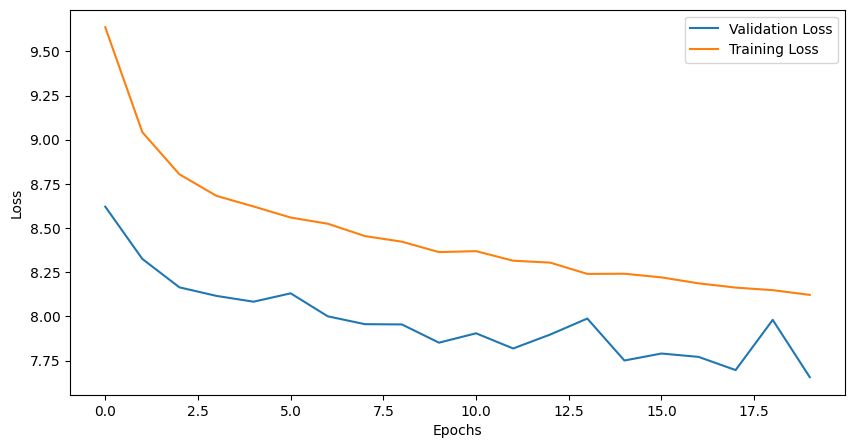

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, ParameterGrid
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

# 데이터셋 경로 정보
DATASETS = [
    {
        "name": "심혈관 6시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_6hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_6hours.csv",
        "sequence_length": 3
    },
    {
        "name": "심혈관 12시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_12hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_12hours.csv",
        "sequence_length": 6
    },
    {
        "name": "심혈관 18시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_target_in_18hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/circulatory_diseases/circulatory_dataset_in_18hour.csv",
        "sequence_length": 9
    },
]

# 하이퍼파라미터 설정
epochs = [10, 20]  # Epoch 수 변경 가능
batch_sizes = [16, 32]  # Batch size 변경 가능
param_grid = {'epochs': epochs, 'batch_size': batch_sizes}
parameter_combinations = list(ParameterGrid(param_grid))

# 모델 학습 및 평가 수행
all_evaluation_results = []

def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for dataset in DATASETS:
    print(f"\nDataset: {dataset['name']}")

    # 데이터 준비
    df_circ_target = pd.read_csv(dataset['target_path'])
    df_circ_dataset = pd.read_csv(dataset['dataset_path'])

    # Feature와 Target 결합
    merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

    # Feature와 Target 분리
    X = merged_dataset.drop(columns=["stay_id", "los"])
    y = merged_dataset["los"]

    # 데이터 스케일링
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # stay_id 및 los 컬럼 다시 추가
    X_scaled_df['stay_id'] = merged_dataset['stay_id']
    X_scaled_df['los'] = y

    # 시퀀스 길이 설정
    sequence_length = dataset['sequence_length']
    print(f"\nSequence Length: {sequence_length}")

    # 텐서 생성
    X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

    if len(X_tensor) == 0 or len(y_tensor) == 0:
        print(f"Skipping sequence length {sequence_length} due to insufficient data.")
        continue

    # K-Fold 교차 검증 수행
    for train_index, test_index in tqdm(kf.split(X_tensor), total=kf.get_n_splits(), desc='K-Fold Cross Validation'):
        X_train, X_test = X_tensor[train_index], X_tensor[test_index]
        y_train, y_test = y_tensor[train_index], y_tensor[test_index]

        for params in parameter_combinations:
            epoch = params['epochs']
            batch_size = params['batch_size']

            # 트랜스포머 모델 정의
            feature_dim = X_train.shape[2]
            inputs = Input(shape=(sequence_length, feature_dim))

            # 트랜스포머 레이어 생성 및 모델 구성
            attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
            attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
            attention_output = Dropout(0.1)(attention_output)

            # 출력 레이어 정의
            pooled_output = GlobalAveragePooling1D()(attention_output)
            output = Dense(1)(pooled_output)
            transformer_model = Model(inputs=inputs, outputs=output)

            # 모델 컴파일
            transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

            # 모델 학습
            if len(X_train) == 0 or len(y_train) == 0:
                print(f"Skipping training due to insufficient training data for sequence length {sequence_length}.")
                continue

            history = transformer_model.fit(
                X_train, y_train,
                epochs=epoch,
                batch_size=batch_size,
                validation_data=(X_test, y_test),
                verbose=0
            )

            # 모델 평가
            def evaluate_model(model, X_test, y_test):
                if len(X_test) == 0 or len(y_test) == 0:
                    return None, None, None, None
                predictions = model.predict(X_test).flatten()
                y_test = y_test.flatten()
                mae = mean_absolute_error(y_test, predictions)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, predictions)
                return mae, mse, rmse, r2

            mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
            if mae is None:
                print(f"Skipping evaluation due to insufficient test data for sequence length {sequence_length}.")
                continue

            evaluation_results = {
                'Dataset': dataset['name'],
                'Sequence Length': sequence_length,
                'Epochs': epoch,
                'Batch Size': batch_size,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            }
            all_evaluation_results.append(evaluation_results)

# 모든 평가 결과 출력
evaluation_df = pd.DataFrame(all_evaluation_results)
print("\nAll Evaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
if 'history' in locals() and len(history.history['val_loss']) > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


## 감염성


Dataset: 감염성질환 6시간

Sequence Length: 3


K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [01:39<06:39, 99.89s/it]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [03:18<04:56, 98.99s/it]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [05:06<03:26, 103.32s/it]

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [06:51<01:43, 103.80s/it]

46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [08:36<00:00, 103.39s/it]


Dataset: 감염성질환 12시간



Sequence Length: 6


K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [04:14<16:59, 254.85s/it]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [08:33<12:50, 256.86s/it]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [12:53<08:37, 258.51s/it]

111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [17:02<04:14, 254.75s/it]

111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
111/111 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [20:48<00:00, 249.65s/it]


Dataset: 감염성질환 18시간



Sequence Length: 9


K-Fold Cross Validation:   0%|          | 0/5 [00:00<?, ?it/s]

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


K-Fold Cross Validation:  20%|██        | 1/5 [07:16<29:07, 436.92s/it]

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


K-Fold Cross Validation:  40%|████      | 2/5 [14:35<21:54, 438.11s/it]

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


K-Fold Cross Validation:  60%|██████    | 3/5 [21:53<14:36, 438.08s/it]

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


K-Fold Cross Validation:  80%|████████  | 4/5 [29:11<07:17, 437.99s/it]

171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
171/171 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


K-Fold Cross Validation: 100%|██████████| 5/5 [36:29<00:00, 437.94s/it]



All Evaluation Results:
       Dataset  Sequence Length  Epochs  Batch Size       MAE        MSE  \
0    감염성질환 6시간                3      10          16  2.366114   9.572523   
1    감염성질환 6시간                3      20          16  2.406165   9.398369   
2    감염성질환 6시간                3      10          32  2.310005   9.676424   
3    감염성질환 6시간                3      20          32  2.412021   9.443616   
4    감염성질환 6시간                3      10          16  2.361162   9.323903   
5    감염성질환 6시간                3      20          16  2.492784   9.473813   
6    감염성질환 6시간                3      10          32  2.307162   9.347348   
7    감염성질환 6시간                3      20          32  2.324392   9.295646   
8    감염성질환 6시간                3      10          16  2.378906   9.256842   
9    감염성질환 6시간                3      20          16  2.339928   9.133096   
10   감염성질환 6시간                3      10          32  2.502388   9.452207   
11   감염성질환 6시간                3      20          32  2.285603  

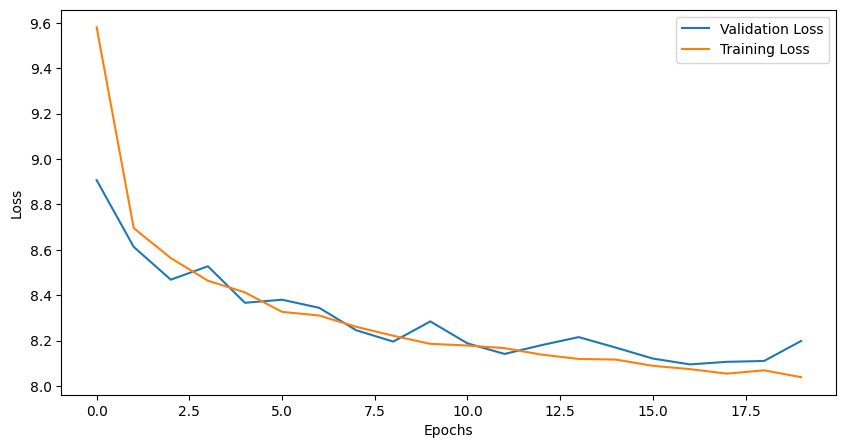

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import KFold, ParameterGrid
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, MultiHeadAttention, LayerNormalization, Dropout, GlobalAveragePooling1D
from tqdm import tqdm

# 데이터셋 경로 정보
DATASETS = [
    {
        "name": "감염성질환 6시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/infection_target_in_6hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/infection_dataset_in_6hour.csv",
        "sequence_length": 3
    },
    {
        "name": "감염성질환 12시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/infection_target_in_12hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/infection_dataset_in_12hour.csv",
        "sequence_length": 6
    },
    {
        "name": "감염성질환 18시간",
        "target_path": "/content/drive/MyDrive/DA_dataset/infection_target_in_18hour.csv",
        "dataset_path": "/content/drive/MyDrive/DA_dataset/infection_dataset_in_18hour.csv",
        "sequence_length": 9
    },
]

# 하이퍼파라미터 설정
epochs = [10, 20]  # Epoch 수 변경 가능
batch_sizes = [16, 32]  # Batch size 변경 가능
param_grid = {'epochs': epochs, 'batch_size': batch_sizes}
parameter_combinations = list(ParameterGrid(param_grid))

# 모델 학습 및 평가 수행
all_evaluation_results = []

def create_tensor_by_stay_id(data, sequence_length):
    grouped = data.groupby('stay_id')
    X_list, y_list, stay_ids = [], [], []
    for stay_id, group in grouped:
        values = group.drop(columns=['stay_id']).values
        features = values[:, :-1]  # 피처
        los_values = values[:, -1]  # 타겟 값

        for i in range(len(features) - sequence_length + 1):
            X_list.append(features[i:i+sequence_length])
            y_list.append(los_values[i+sequence_length-1])
            stay_ids.append(stay_id)
    return np.array(X_list), np.array(y_list), stay_ids

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for dataset in DATASETS:
    print(f"\nDataset: {dataset['name']}")

    # 데이터 준비
    df_circ_target = pd.read_csv(dataset['target_path'])
    df_circ_dataset = pd.read_csv(dataset['dataset_path'])

    # Feature와 Target 결합
    merged_dataset = pd.merge(df_circ_dataset, df_circ_target, on='stay_id')

    # Feature와 Target 분리
    X = merged_dataset.drop(columns=["stay_id", "los"])
    y = merged_dataset["los"]

    # 데이터 스케일링
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

    # stay_id 및 los 컬럼 다시 추가
    X_scaled_df['stay_id'] = merged_dataset['stay_id']
    X_scaled_df['los'] = y

    # 시퀀스 길이 설정
    sequence_length = dataset['sequence_length']
    print(f"\nSequence Length: {sequence_length}")

    # 텐서 생성
    X_tensor, y_tensor, stay_ids = create_tensor_by_stay_id(X_scaled_df, sequence_length)

    if len(X_tensor) == 0 or len(y_tensor) == 0:
        print(f"Skipping sequence length {sequence_length} due to insufficient data.")
        continue

    # K-Fold 교차 검증 수행
    for train_index, test_index in tqdm(kf.split(X_tensor), total=kf.get_n_splits(), desc='K-Fold Cross Validation'):
        X_train, X_test = X_tensor[train_index], X_tensor[test_index]
        y_train, y_test = y_tensor[train_index], y_tensor[test_index]

        for params in parameter_combinations:
            epoch = params['epochs']
            batch_size = params['batch_size']

            # 트랜스포머 모델 정의
            feature_dim = X_train.shape[2]
            inputs = Input(shape=(sequence_length, feature_dim))

            # 트랜스포머 레이어 생성 및 모델 구성
            attention_output = MultiHeadAttention(num_heads=4, key_dim=feature_dim)(inputs, inputs)
            attention_output = LayerNormalization(epsilon=1e-6)(attention_output + inputs)
            attention_output = Dropout(0.1)(attention_output)

            # 출력 레이어 정의
            pooled_output = GlobalAveragePooling1D()(attention_output)
            output = Dense(1)(pooled_output)
            transformer_model = Model(inputs=inputs, outputs=output)

            # 모델 컴파일
            transformer_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

            # 모델 학습
            if len(X_train) == 0 or len(y_train) == 0:
                print(f"Skipping training due to insufficient training data for sequence length {sequence_length}.")
                continue

            history = transformer_model.fit(
                X_train, y_train,
                epochs=epoch,
                batch_size=batch_size,
                validation_data=(X_test, y_test),
                verbose=0
            )

            # 모델 평가
            def evaluate_model(model, X_test, y_test):
                if len(X_test) == 0 or len(y_test) == 0:
                    return None, None, None, None
                predictions = model.predict(X_test).flatten()
                y_test = y_test.flatten()
                mae = mean_absolute_error(y_test, predictions)
                mse = mean_squared_error(y_test, predictions)
                rmse = np.sqrt(mse)
                r2 = r2_score(y_test, predictions)
                return mae, mse, rmse, r2

            mae, mse, rmse, r2 = evaluate_model(transformer_model, X_test, y_test)
            if mae is None:
                print(f"Skipping evaluation due to insufficient test data for sequence length {sequence_length}.")
                continue

            evaluation_results = {
                'Dataset': dataset['name'],
                'Sequence Length': sequence_length,
                'Epochs': epoch,
                'Batch Size': batch_size,
                'MAE': mae,
                'MSE': mse,
                'RMSE': rmse,
                'R2': r2
            }
            all_evaluation_results.append(evaluation_results)

# 모든 평가 결과 출력
evaluation_df = pd.DataFrame(all_evaluation_results)
print("\nAll Evaluation Results:")
print(evaluation_df)

# 학습 결과 시각화
if 'history' in locals() and len(history.history['val_loss']) > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
